In [1]:
import numpy as np
import scipy.stats as stats

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Example Data 생성

y=np.random.random(100)
x=np.arange(len(y))

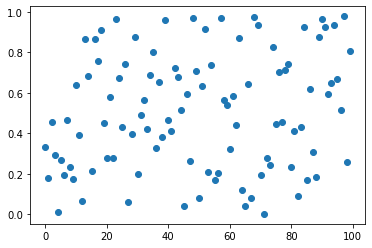

In [4]:
plt.scatter(x,y)
plt.show()

In [5]:
# test static 계산하는 함수

def test_stat(y, iteration):
    std_dev=np.std(y)
    avg_y=np.mean(y)
    abs_val_minus_avg=abs(y-avg_y)
    max_of_deviations=max(abs_val_minus_avg)
    max_ind=np.argmax(abs_val_minus_avg)
    cal=max_of_deviations/std_dev
    print('Test Statistic Value(R{}): {}'.format(iteration,cal))
    return cal, max_ind

In [6]:
# Critical Value 계산하는 함수

def calculate_critical_value(size, alpha, iteration):
    t_dist=stats.t.ppf(1-alpha/(2*size),size-2)
    numerator=(size-1)*np.sqrt(np.square(t_dist))
    denominator=np.sqrt(size)*np.sqrt(size-2+np.square(t_dist))
    critical_value=numerator/denominator
    print('Critical Value(λ{}):{}'.format(iteration, critical_value))
    return critical_value

In [7]:
def check_values(R, C, inp, max_index, iteration):
    if R > C:
        print('{} is an outlier. R{} > λ{}: {:.4f} > {:.4f} \n'.format(inp[max_index],iteration, iteration, R, C))
    else:
        print('{} is not an outlier. R{}> λ{}: {:.4f} > {:.4f} \n'.format(inp[max_index],iteration, iteration, R, C))

In [11]:
#GESD test 하는 함수

def ESD_Test(input_series, alpha, max_outliers):
    stats=[]
    critical_vals=[]
    max_i=0
    for iterations in range(1, max_outliers+1):
        stat, max_index=test_stat(input_series, iterations)
        critical=calculate_critical_value(len(input_series),alpha,iterations)
        check_values(stat, critical, input_series, max_index, iterations)
        input_series=np.delete(input_series, max_index)
        critical_vals.append(critical)
        stats.append(stat)
        if stat>critical:
            max_i=iterations
            
    
    df=pd.DataFrame({'i':range(1,max_outliers+1),'Ri':stats,'λi':critical_vals})
    
    def highlight_max(x):
        if x.i==max_i:
            return['background-color: yellow']*3
        else:
            return['background-color:white']*3
        
    df.index=df.index+1
    print('Number of outliers {}'.format(max_i))
    
    return df.style.apply(highlight_max, axis=1)

In [12]:
ESD_Test(y,0.05,7)

Test Statistic Value(R1): 1.7755298600727716
Critical Value(λ1):3.384082902288351
0.0011189867823088173 is not an outlier. R1> λ1: 1.7755 > 3.3841 

Test Statistic Value(R2): 1.7762051159350458
Critical Value(λ2):3.380650508067058
0.01164801686124628 is not an outlier. R2> λ2: 1.7762 > 3.3807 

Test Statistic Value(R3): 1.7142010308843036
Critical Value(λ3):3.377175980782947
0.03963770331186234 is not an outlier. R3> λ3: 1.7142 > 3.3772 

Test Statistic Value(R4): 1.7466140009126483
Critical Value(λ4):3.3736583400522497
0.040494255433385695 is not an outlier. R4> λ4: 1.7466 > 3.3737 

Test Statistic Value(R5): 1.7149092454522543
Critical Value(λ5):3.370096570986626
0.05940635755282153 is not an outlier. R5> λ5: 1.7149 > 3.3701 

Test Statistic Value(R6): 1.7346011570762276
Critical Value(λ6):3.3664896240676505
0.06389362929670728 is not an outlier. R6> λ6: 1.7346 > 3.3665 

Test Statistic Value(R7): 1.7160343277020411
Critical Value(λ7):3.362836413028039
0.07893704005766555 is not an o

,i,Ri,λi
1,1,1.775530,3.384083
2,2,1.776205,3.380651
3,3,1.714201,3.377176
4,4,1.746614,3.373658
5,5,1.714909,3.370097
6,6,1.734601,3.366490
7,7,1.716034,3.362836
